In [1]:
import sys
sys.path.insert(0, "/home/ubuntu/aiclass/1731036006_yonggeunwoo/")

import tensorflux.graph as tfg
import tensorflux.deep_learning_networks as tfn
import tensorflux.enums as tfe
import datasource.mnist as mnist
import tensorflux.functions as tff
import math
%matplotlib inline
# pip install pygraphviz

In [2]:
input_size = 784
hidden_layer1_size = 128
hidden_layer2_size = 128
output_size = 10

x = tfg.Placeholder(name="x")
target = tfg.Placeholder(name="target")

n = tfn.Multi_Layer_Network(
    input_size=input_size,
    hidden_size_list=[hidden_layer1_size, hidden_layer2_size],
    output_size=output_size,
    input_node=x,
    target_node=target,
    init_mean=0.0,
    init_sd=0.01,
    activator=tfe.Activator.ReLU.value,
    optimizer=tfe.Optimizer.SGD.value,
    learning_rate=0.01
)

In [3]:
#n.draw_and_show(figsize=(20, 10))

In [4]:
#data = mnist.MNIST_Data()
data = mnist.Fashion_MNIST_Data()

In [5]:
forward_final_output = n.feed_forward(input_data=data.test_input)
#print(forward_final_output.shape)
print("Initial Accuracy", tff.accuracy(forward_final_output, data.test_target))

batch_size = 1000
n.learning(max_epoch=100, data=data, batch_size=batch_size, print_period=1, verbose=False)

forward_final_output = n.feed_forward(input_data=data.test_input)
print("Post-learning Accuracy", tff.accuracy(forward_final_output, data.test_target))

Initial Accuracy 0.1016
Epoch   0 Completed - Train Error: 2.320142 - Validation Error: 2.329689 - Test Accuracy: 0.101600
Epoch   1 Completed - Train Error: 0.772444 - Validation Error: 0.751254 - Test Accuracy: 0.698300
Epoch   2 Completed - Train Error: 0.615110 - Validation Error: 0.578480 - Test Accuracy: 0.758500
Epoch   3 Completed - Train Error: 0.516721 - Validation Error: 0.524058 - Test Accuracy: 0.788100
Epoch   4 Completed - Train Error: 0.476619 - Validation Error: 0.461210 - Test Accuracy: 0.825000
Epoch   5 Completed - Train Error: 0.413920 - Validation Error: 0.439852 - Test Accuracy: 0.829000
Epoch   6 Completed - Train Error: 0.400758 - Validation Error: 0.428526 - Test Accuracy: 0.830300
Epoch   7 Completed - Train Error: 0.439426 - Validation Error: 0.443396 - Test Accuracy: 0.831000
Epoch   8 Completed - Train Error: 0.411175 - Validation Error: 0.404581 - Test Accuracy: 0.840100
Epoch   9 Completed - Train Error: 0.366745 - Validation Error: 0.385356 - Test Accur

Epoch  83 Completed - Train Error: 0.863672 - Validation Error: 0.899420 - Test Accuracy: 0.606900
Epoch  84 Completed - Train Error: 0.900169 - Validation Error: 0.871932 - Test Accuracy: 0.625200
Epoch  85 Completed - Train Error: 1.072408 - Validation Error: 1.043128 - Test Accuracy: 0.549100
Epoch  86 Completed - Train Error: 0.909382 - Validation Error: 0.943357 - Test Accuracy: 0.571600
Epoch  87 Completed - Train Error: 0.937833 - Validation Error: 0.932029 - Test Accuracy: 0.566800
Epoch  88 Completed - Train Error: 0.913620 - Validation Error: 0.909798 - Test Accuracy: 0.577600
Epoch  89 Completed - Train Error: 0.923402 - Validation Error: 0.900820 - Test Accuracy: 0.582600
Epoch  90 Completed - Train Error: 0.976044 - Validation Error: 0.937901 - Test Accuracy: 0.566900
Epoch  91 Completed - Train Error: 0.910185 - Validation Error: 0.902692 - Test Accuracy: 0.572700
Epoch  92 Completed - Train Error: 0.948926 - Validation Error: 0.898237 - Test Accuracy: 0.592100
Epoch  93 

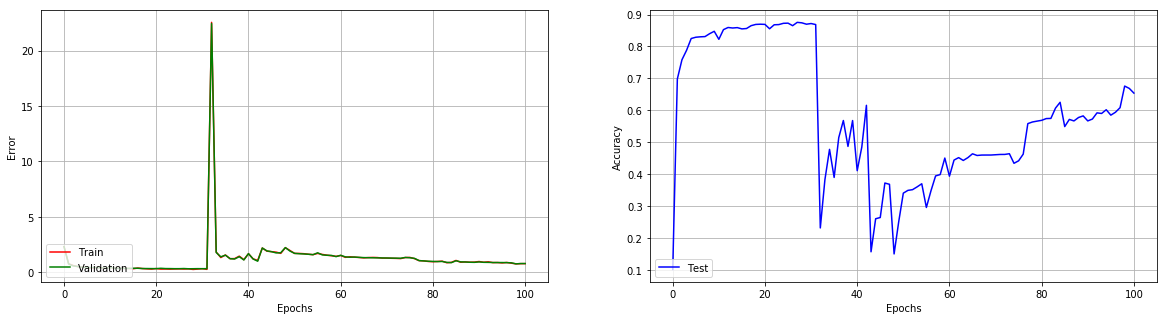

In [6]:
n.draw_error_values_and_accuracy(figsize=(20, 5))

False Prediction Index: 4, Prediction: t_shirt_top, Ground Truth: shirt
False Prediction Index: 6, Prediction: pullover, Ground Truth: coat
False Prediction Index: 7, Prediction: pullover, Ground Truth: shirt
False Prediction Index: 10, Prediction: pullover, Ground Truth: coat
False Prediction Index: 12, Prediction: sandal, Ground Truth: sneaker


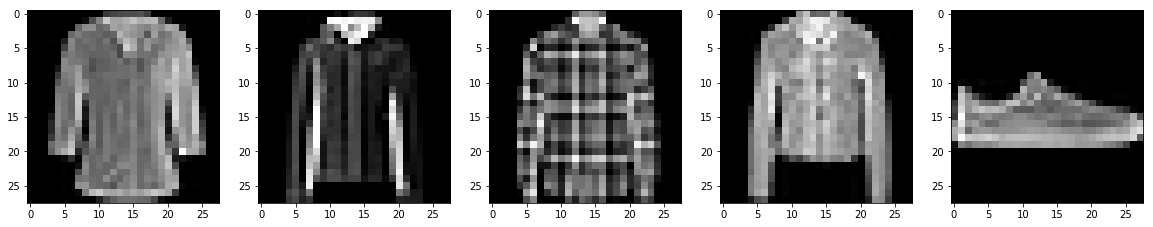

In [7]:
n.draw_false_prediction(data.test_input, data.test_target, data.labels, num=5, figsize=(20, 5))

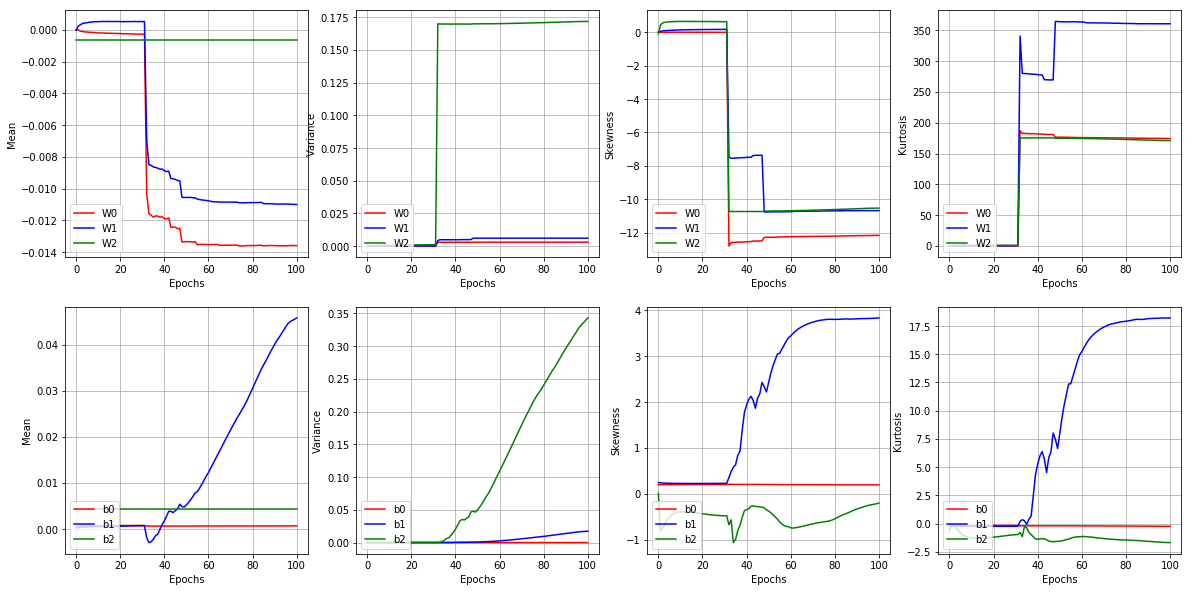

In [8]:
n.draw_param_description(figsize=(20, 10))